In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0'

from fastai import *
from fastai.vision import *
from batch_norm_vgg import VGG, make_layers, make_layers_BN
from batch_norm_callbacks import ICS, AccuracyList, AccuracyValidationList
import matplotlib.pyplot as plt
import time

In [2]:
data_path = untar_data(URLs.CIFAR)

In [3]:
data_path.ls()

[PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/test'),
 PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/train'),
 PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/labels.txt'),
 PosixPath('/data/students_home/fmameli/.fastai/data/cifar10/models')]

In [4]:
data = ImageDataBunch.from_folder(
                data_path, valid='test', size=32, bs=128
            )#.split_by_idxs(
#                 train_idx=[0, 1, 2, 3, 4, 5, 5000, 5001, 5002,5003,5004,5005], valid_idx=[0, 1, 2, 3, 4, 5, 1000,1001, 1002,1003,1004,1005]
#             ).label_from_folder(
#             ).databunch(bs=2, num_workers=1, no_check=True)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD

learn_rate = 0.01

In [6]:
vgg = VGG(make_layers(batch_norm=True), num_classes=data.c).cuda()

In [7]:
learn_vgg = Learner(data, vgg, opt_func=optimizer,
                               loss_func=criterion,
                               true_wd=False,
                               wd=0.,
                               bn_wd=False,
                               metrics=accuracy)

accList_BN = AccuracyList(learn_vgg)
icsList_BN = ICS(learn_vgg, num_classes=data.c, bn=True )
accListVal_BN = AccuracyValidationList()

learn_vgg.metrics.append(accListVal_BN)

In [8]:
learn_vgg.metrics

[<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7fb8d83a3ae8>>,
 AccuracyValidationList]

In [9]:
learn_vgg.fit(30, lr=learn_rate, callbacks=[accList_BN, icsList_BN])

epoch,train_loss,valid_loss,accuracy,Val Acc,time
0,1.613862,1.612417,0.390800,0.388548,01:13
1,1.343555,1.306689,0.510500,0.512460,01:03
2,1.185615,1.192176,0.565300,0.565269,01:06
3,1.038114,1.154169,0.589600,0.589300,01:07
4,0.927572,1.117684,0.601200,0.599387,01:01
5,0.848076,0.895431,0.682500,0.684632,01:01
6,0.768620,0.868094,0.689500,0.689478,01:02
7,0.694184,1.224350,0.606600,0.606804,01:02
8,0.608535,0.850994,0.714800,0.715190,01:02
9,0.550958,0.945697,0.689200,0.686412,01:02


In [10]:
accListVal_BN.val_accs

[tensor(0.3885, device='cuda:0'),
 tensor(0.5125, device='cuda:0'),
 tensor(0.5653, device='cuda:0'),
 tensor(0.5893, device='cuda:0'),
 tensor(0.5994, device='cuda:0'),
 tensor(0.6846, device='cuda:0'),
 tensor(0.6895, device='cuda:0'),
 tensor(0.6068, device='cuda:0'),
 tensor(0.7152, device='cuda:0'),
 tensor(0.6864, device='cuda:0'),
 tensor(0.7043, device='cuda:0'),
 tensor(0.7510, device='cuda:0'),
 tensor(0.6671, device='cuda:0'),
 tensor(0.7376, device='cuda:0'),
 tensor(0.7614, device='cuda:0'),
 tensor(0.6885, device='cuda:0'),
 tensor(0.6696, device='cuda:0'),
 tensor(0.7647, device='cuda:0'),
 tensor(0.7037, device='cuda:0'),
 tensor(0.7577, device='cuda:0'),
 tensor(0.7646, device='cuda:0'),
 tensor(0.7784, device='cuda:0'),
 tensor(0.7791, device='cuda:0'),
 tensor(0.7820, device='cuda:0'),
 tensor(0.7866, device='cuda:0'),
 tensor(0.7883, device='cuda:0'),
 tensor(0.7793, device='cuda:0'),
 tensor(0.7912, device='cuda:0'),
 tensor(0.7904, device='cuda:0'),
 tensor(0.7919

In [11]:
# plt.plot(accList.accs)

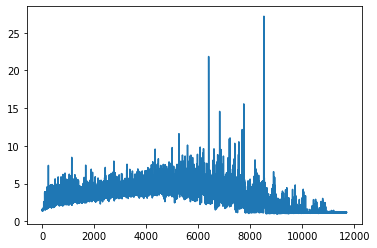

In [12]:
plt.plot(icsList_BN.ics_values)

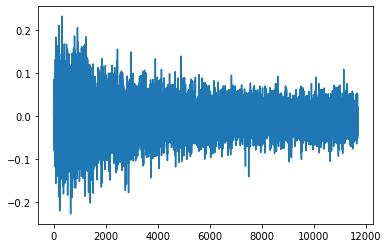

In [13]:
plt.plot(icsList_BN.cos_values)

In [14]:
vgg = VGG(make_layers(batch_norm=False), num_classes=data.c).cuda()

In [15]:
learn_vgg = Learner(data, vgg, opt_func=optimizer,
                               loss_func=criterion,
                               true_wd=False,
                               wd=0.,
                               bn_wd=False,
                               metrics=accuracy)

accList_noBN = AccuracyList(learn_vgg)
icsList_noBN = ICS(learn_vgg, num_classes=data.c, bn=False )
accListVal_noBN = AccuracyValidationList()

learn_vgg.metrics.append(accListVal_noBN)

In [16]:
learn_vgg.fit(30, lr=learn_rate, callbacks=[accList_noBN, icsList_noBN])

epoch,train_loss,valid_loss,accuracy,Val Acc,time
0,2.300395,2.299299,0.107900,0.106705,01:02
1,2.286407,2.276757,0.126400,0.125000,01:03
2,2.129896,2.105931,0.217500,0.215091,01:03
3,2.023277,1.958271,0.268200,0.265229,01:03
4,1.934546,1.903534,0.295600,0.293018,01:03
5,1.832050,1.738277,0.359400,0.356112,01:03
6,1.730367,1.726035,0.371200,0.369165,01:03
7,1.650582,1.550544,0.427600,0.424248,01:03
8,1.573819,1.596746,0.425100,0.423853,01:03
9,1.509093,1.431091,0.482400,0.479134,01:03


In [17]:
accListVal_noBN.val_accs

[tensor(0.1067, device='cuda:0'),
 tensor(0.1250, device='cuda:0'),
 tensor(0.2151, device='cuda:0'),
 tensor(0.2652, device='cuda:0'),
 tensor(0.2930, device='cuda:0'),
 tensor(0.3561, device='cuda:0'),
 tensor(0.3692, device='cuda:0'),
 tensor(0.4242, device='cuda:0'),
 tensor(0.4239, device='cuda:0'),
 tensor(0.4791, device='cuda:0'),
 tensor(0.4910, device='cuda:0'),
 tensor(0.4948, device='cuda:0'),
 tensor(0.5338, device='cuda:0'),
 tensor(0.5653, device='cuda:0'),
 tensor(0.5771, device='cuda:0'),
 tensor(0.6038, device='cuda:0'),
 tensor(0.5891, device='cuda:0'),
 tensor(0.6206, device='cuda:0'),
 tensor(0.6349, device='cuda:0'),
 tensor(0.6511, device='cuda:0'),
 tensor(0.6697, device='cuda:0'),
 tensor(0.6755, device='cuda:0'),
 tensor(0.6640, device='cuda:0'),
 tensor(0.6956, device='cuda:0'),
 tensor(0.6928, device='cuda:0'),
 tensor(0.6614, device='cuda:0'),
 tensor(0.7055, device='cuda:0'),
 tensor(0.6846, device='cuda:0'),
 tensor(0.7082, device='cuda:0'),
 tensor(0.7248

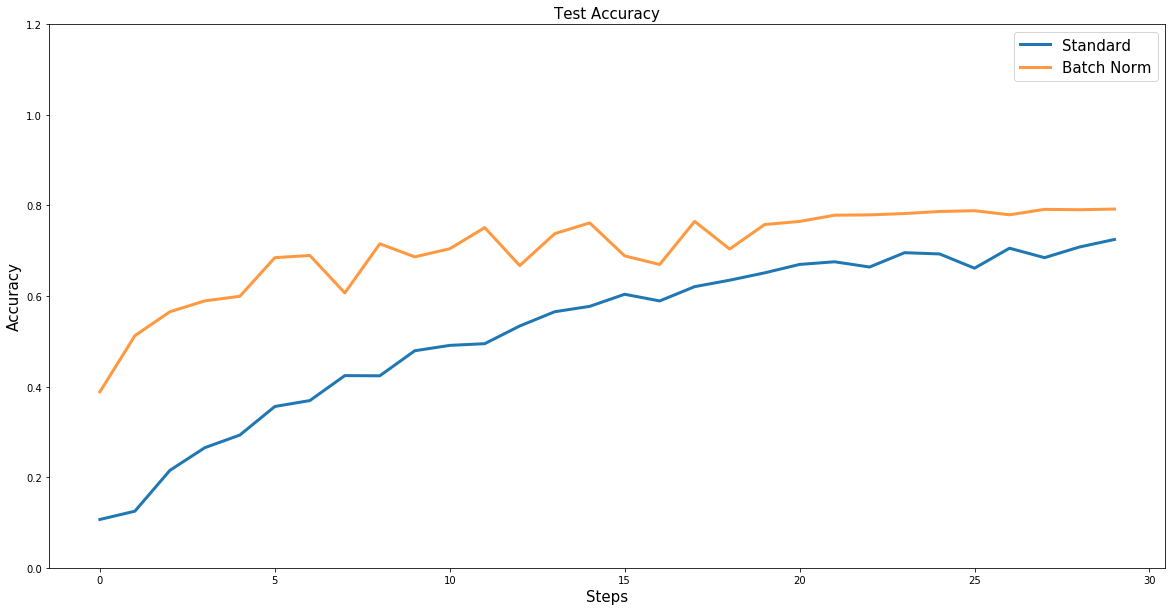

In [18]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ylim(top=1.2, bottom=0)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Steps", fontsize=15)
plt.title("Test Accuracy", fontsize=15)
plt.plot(accListVal_noBN.val_accs, linewidth=3, label="Standard")
plt.plot(accListVal_BN.val_accs, linewidth=3, alpha=0.80, label="Batch Norm")
ax.legend(fontsize=15)


plt.savefig('VAL_ACC.png')

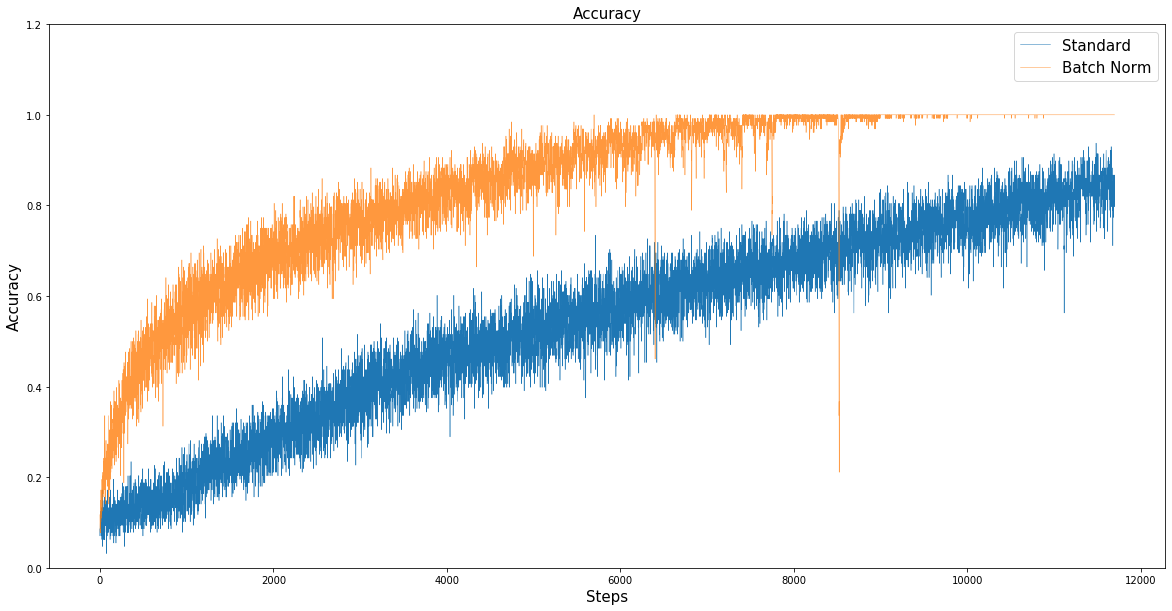

In [19]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ylim(top=1.2, bottom=0)
plt.ylabel("Accuracy", fontsize=15)
plt.xlabel("Steps", fontsize=15)
plt.title("Accuracy", fontsize=15)
plt.plot(accList_noBN.accs, linewidth=0.5, label="Standard")
plt.plot(accList_BN.accs, linewidth=0.5, alpha=0.80, label="Batch Norm")
ax.legend(fontsize=15)


plt.savefig('ACC.png')

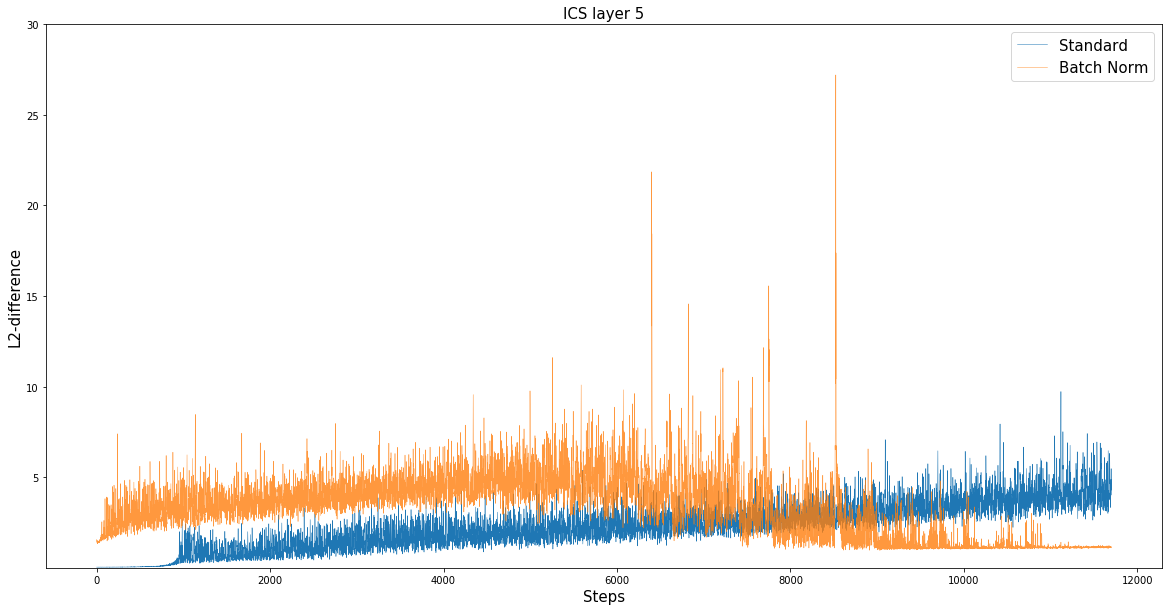

In [20]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ylim(top=30, bottom=0.01)
plt.ylabel("L2-difference", fontsize=15)
plt.xlabel("Steps", fontsize=15)
plt.title("ICS layer 5", fontsize=15)
plt.plot(icsList_noBN.ics_values, linewidth=0.5, label="Standard")
plt.plot(icsList_BN.ics_values, linewidth=0.5, alpha=0.80, label="Batch Norm")
ax.legend(fontsize=15)


plt.savefig('ICS.png')

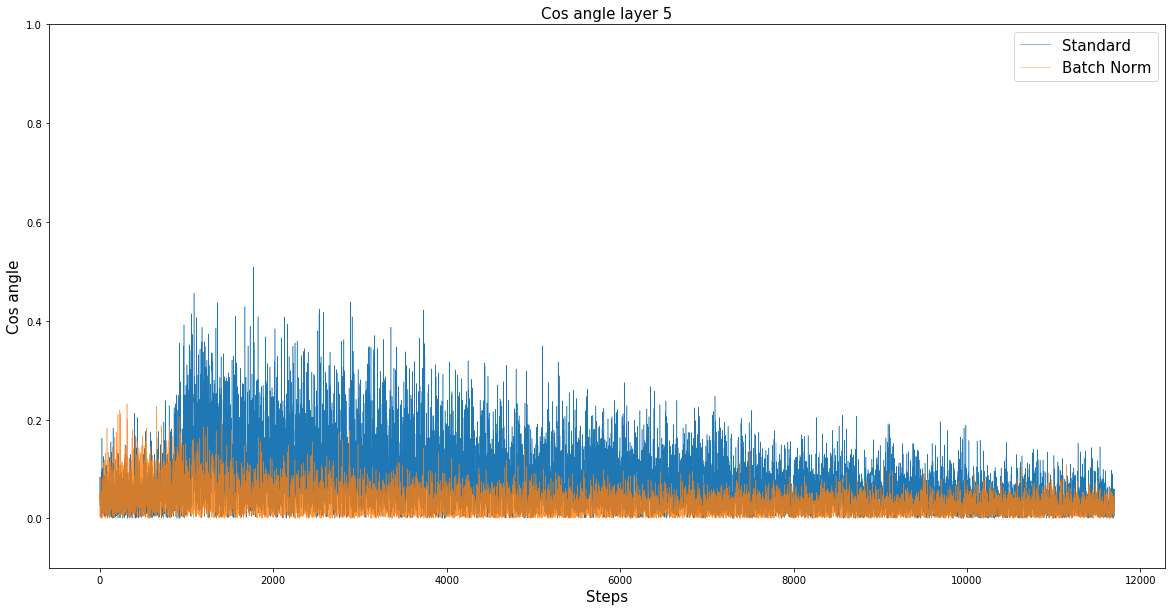

In [21]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
plt.ylim(top=1, bottom=-0.1)
plt.ylabel("Cos angle", fontsize=15)
plt.xlabel("Steps", fontsize=15)
plt.title("Cos angle layer 5", fontsize=15)
plt.plot([abs(e) for e in icsList_noBN.cos_values], linewidth=0.5, label="Standard")
plt.plot([abs(e) for e in icsList_BN.cos_values], linewidth=0.5, alpha=0.80, label="Batch Norm")
ax.legend(fontsize=15)


plt.savefig('COS.png')